# ProsperLoanData Exploration
## by Jianming

## Investigation Overview

In this investigation, I wanted to look at what factors could influence people's delinquent in current loan?. DelinquenciesLast7Years and EmploymentStatus might be the top 2 features for help.

## Dataset Overview

The dataset shows the loan dadata for 113937 listing and has 81 variables including listing Key, loan status, borrowerAPR and so on.

In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [51]:
# load dataset
loandata = pd.read_csv('prosperLoanData.csv')
# print the first five rows
display(loandata.head())

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [52]:
# print the general information about the dataset
print(loandata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [53]:
# pick up 15 variables for analysis after reading the description of all variables
variables_15 = ['ListingKey','LoanStatus','CreditGrade','ListingCreationDate','Term','ClosedDate','ProsperScore',
                 'ListingCategory (numeric)','EmploymentStatus','IncomeRange','Recommendations','MonthlyLoanPayment',
                 'LoanCurrentDaysDelinquent','Investors','DelinquenciesLast7Years']

In [54]:
# slice the new dataset with 15 variables for analysis
loandata_analyze = loandata[variables_15]
display(loandata_analyze.head())

,ListingKey,LoanStatus,CreditGrade,ListingCreationDate,Term,ClosedDate,ProsperScore,ListingCategory (numeric),EmploymentStatus,IncomeRange,Recommendations,MonthlyLoanPayment,LoanCurrentDaysDelinquent,Investors,DelinquenciesLast7Years
0,1021339766868145413AB3B,Completed,C,2007-08-26 19:09:29.263000000,36,2009-08-14 00:00:00,NaN,0,Self-employed,"$25,000-49,999",0,330.43,0,258,4.0
1,10273602499503308B223C1,Current,NaN,2014-02-27 08:28:07.900000000,36,NaN,7.0,2,Employed,"$50,000-74,999",0,318.93,0,1,0.0
2,0EE9337825851032864889A,Completed,HR,2007-01-05 15:00:47.090000000,36,2009-12-17 00:00:00,NaN,0,Not available,Not displayed,0,123.32,0,41,0.0
3,0EF5356002482715299901A,Current,NaN,2012-10-22 11:02:35.010000000,36,NaN,9.0,16,Employed,"$25,000-49,999",0,321.45,0,158,14.0
4,0F023589499656230C5E3E2,Current,NaN,2013-09-14 18:38:39.097000000,36,NaN,4.0,2,Employed,"$100,000+",0,563.97,0,20,0.0


In [55]:
# see the general information
loandata_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   LoanStatus                 113937 non-null  object 
 2   CreditGrade                28953 non-null   object 
 3   ListingCreationDate        113937 non-null  object 
 4   Term                       113937 non-null  int64  
 5   ClosedDate                 55089 non-null   object 
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   EmploymentStatus           111682 non-null  object 
 9   IncomeRange                113937 non-null  object 
 10  Recommendations            113937 non-null  int64  
 11  MonthlyLoanPayment         113937 non-null  float64
 12  LoanCurrentDaysDelinquent  113937 non-null  int64  
 13  Investors                  11

In [56]:
# convert certain columns' type into category
category_variable = ['LoanStatus','CreditGrade','ListingCategory (numeric)',
                 'EmploymentStatus','IncomeRange']
loandata_analyze = loandata_analyze.copy()
for i in category_variable:
    loandata_analyze[i] = loandata_analyze[i].astype('category')

In [57]:
# check the convertion
loandata_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingKey                 113937 non-null  object  
 1   LoanStatus                 113937 non-null  category
 2   CreditGrade                28953 non-null   category
 3   ListingCreationDate        113937 non-null  object  
 4   Term                       113937 non-null  int64   
 5   ClosedDate                 55089 non-null   object  
 6   ProsperScore               84853 non-null   float64 
 7   ListingCategory (numeric)  113937 non-null  category
 8   EmploymentStatus           111682 non-null  category
 9   IncomeRange                113937 non-null  category
 10  Recommendations            113937 non-null  int64   
 11  MonthlyLoanPayment         113937 non-null  float64 
 12  LoanCurrentDaysDelinquent  113937 non-null  int64   
 13  Investors     

In [58]:
# show the statistic summary for numeric columns
display(loandata_analyze.describe())

,Term,ProsperScore,Recommendations,MonthlyLoanPayment,LoanCurrentDaysDelinquent,Investors,DelinquenciesLast7Years
count,113937.000000,84853.000000,113937.000000,113937.000000,113937.000000,113937.000000,112947.000000
mean,40.830248,5.950067,0.048027,272.475783,152.816539,80.475228,4.154984
std,10.436212,2.376501,0.332353,192.697812,466.320254,103.239020,10.160216
min,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,36.000000,4.000000,0.000000,131.620000,0.000000,2.000000,0.000000
50%,36.000000,6.000000,0.000000,217.740000,0.000000,44.000000,0.000000
75%,36.000000,8.000000,0.000000,371.580000,0.000000,115.000000,3.000000
max,60.000000,11.000000,39.000000,2251.510000,2704.000000,1189.000000,99.000000


### What is the structure of your dataset?

> There are 113973 entries in this dataset with 13 features ('ListingKey','LoanStatus','CreditGrade','ListingCreationDate','Term','ClosedDate','ProsperScore',
 'ListingCategory (numeric)','EmploymentStatus','IncomeRange','Recommendations','MonthlyLoanPayment',
 'LoanCurrentDaysDelinquent','Investors'), 
 Some are numeric variables, while some are categorical variables and shows as following:
 <br>
 <br>
'LoanStatus': current status of the loan
<br>
'CreditGrade': credit rating that was assigned at the time the listing went live
<br>
'ListingCategory (numeric)': the category of the listing that the borrower selected when posting their listing
<br>
'EmploymentStatus': the employment status of the borrower at the time they posted the listing
<br>
'IncomeRange': the income range of the borrower at the time the listing was created


### What is/are the main feature(s) of interest in your dataset?

> What factors could influence people's delinquent in current loan?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> DelinquenciesLast7Years and EmploymentStatus might be the top 2 features for help.

## Univariate Exploration

## Distribution of MonthlyLoanPayment
MonthlyLoanPayment has a long-tailed distribution, with only a few listing has very high MonthlyLoanPayment, this fits our common sense.

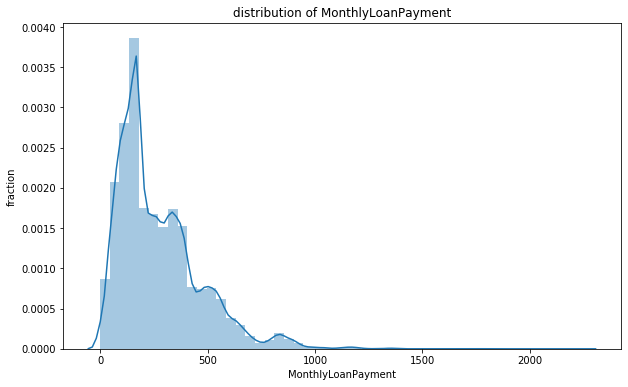

MonthlyLoanPayment has a long-tailed distribution, with only a few listing has very high MonthlyLoanPayment, this fits our common sense.


In [59]:
# plot the distribution of MonthlyLoanPayment
plt.figure(figsize = (10,6))
sb.distplot(loandata_analyze['MonthlyLoanPayment'])
plt.ylabel('fraction')
plt.title('distribution of MonthlyLoanPayment')
plt.show()
print('MonthlyLoanPayment has a long-tailed distribution, with only a few listing has very high MonthlyLoanPayment, this fits our common sense.')

## Distribution of LoanCurrentDaysDelinquent
LoanCurrentDaysDelinquent has a long-tailed distribution, with only a few listing has very high LoanCurrentDaysDelinquent, most listings has 0 LoanCurrentDaysDelinquent. This gave us a sense that if one listing's current daysdelinquent is over 120 days, it will highly likely to become defaulted or chargedoff in the end.

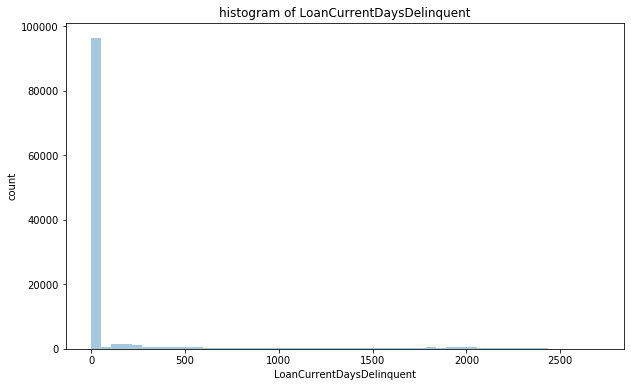

LoanCurrentDaysDelinquent has a long-tailed distribution, with only a few listing has very high LoanCurrentDaysDelinquent, most listings has 0 LoanCurrentDaysDelinquent.


In [60]:
# plot the distribution of LoanCurrentDaysDelinquent
plt.figure(figsize = (10,6))
sb.distplot(loandata_analyze['LoanCurrentDaysDelinquent'],kde=False)
plt.ylabel('count')
plt.title('histogram of LoanCurrentDaysDelinquent')
plt.show()
print('LoanCurrentDaysDelinquent has a long-tailed distribution, with only a few listing has very high LoanCurrentDaysDelinquent, most listings has 0 LoanCurrentDaysDelinquent.')

In [61]:
# the histogram shows only few listing has a very high daysdelinquent
# so we decide to see the loanstatus of these listings
display(loandata_analyze['LoanCurrentDaysDelinquent'].describe())
loandata_analyze[loandata_analyze['LoanCurrentDaysDelinquent'] > 120]['LoanStatus'].value_counts()

count    113937.000000
mean        152.816539
std         466.320254
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2704.000000
Name: LoanCurrentDaysDelinquent, dtype: float64

Chargedoff                11992
Defaulted                  4805
Past Due (>120 days)         16
Past Due (91-120 days)        0
Past Due (61-90 days)         0
Past Due (31-60 days)         0
Past Due (16-30 days)         0
Past Due (1-15 days)          0
FinalPaymentInProgress        0
Current                       0
Completed                     0
Cancelled                     0
Name: LoanStatus, dtype: int64

## Distribution of Investors
Investors has a long-tailed distribution, with only a few listing has losts of investors to fund the loan, most listings has no investor.

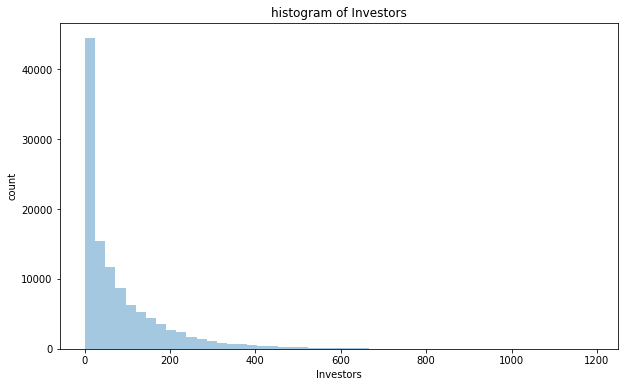

In [62]:
# plot the histogram of investors
plt.figure(figsize = (10,6))
sb.distplot(loandata_analyze['Investors'],kde = False)
plt.ylabel('count')
plt.title('histogram of Investors')
plt.show('Investors has a long-tailed distribution, with only a few listing has losts of investors to fund the loan, most listings has no investor.')

## Distribution of DelinquenciesLast7Years
DelinquenciesLast7Years has a long-tailed distribution, with only a few listing has lots of delinquencies in the last 7 years, most listings has 0 delinquencies in the last 7 years.

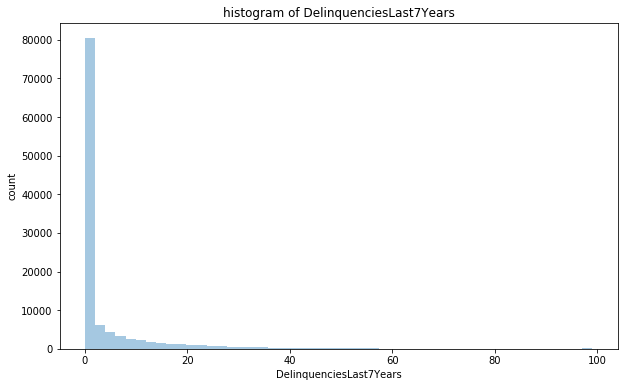

DelinquenciesLast7Years has a long-tailed distribution, with only a few listing has lots of delinquencies in the last 7 years, most listings has 0 delinquencies in the last 7 years.


In [63]:
# plot the histogram of DelinquenciesLast7Years
plt.figure(figsize = (10,6))
sb.distplot(loandata_analyze['DelinquenciesLast7Years'],kde = False)
plt.ylabel('count')
plt.title('histogram of DelinquenciesLast7Years')
plt.show()
print('DelinquenciesLast7Years has a long-tailed distribution, with only a few listing has lots of delinquencies in the last 7 years, most listings has 0 delinquencies in the last 7 years.')

In [64]:
category_variable = ['LoanStatus','CreditGrade','ListingCategory (numeric)',
                 'EmploymentStatus','IncomeRange']

## Countplot of DelinquenciesLast7Years
Most of the listings have employment status of 'employed' or 'full-time', we might need to take deeper look of the relationship between employment status and other variables later.

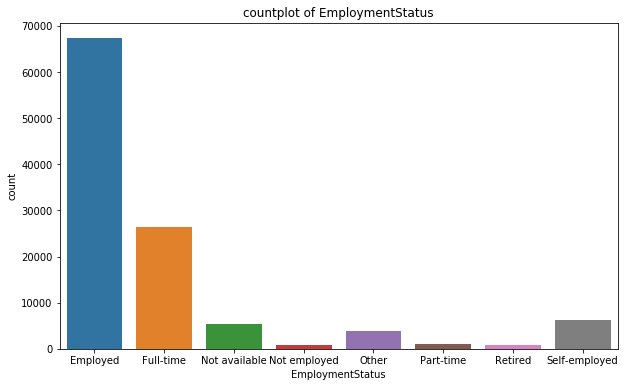

Most of the listings have employment status of employed or full-time


In [65]:
# plot the countplot of EmploymentStatus
plt.figure(figsize = (10,6))
sb.countplot(loandata_analyze['EmploymentStatus'])
plt.ylabel('count')
plt.title('countplot of EmploymentStatus')
plt.show()
print('Most of the listings have employment status of employed or full-time')

## Countplot of ListingCategory
The top 1 listing categories are Debt Consolidation.

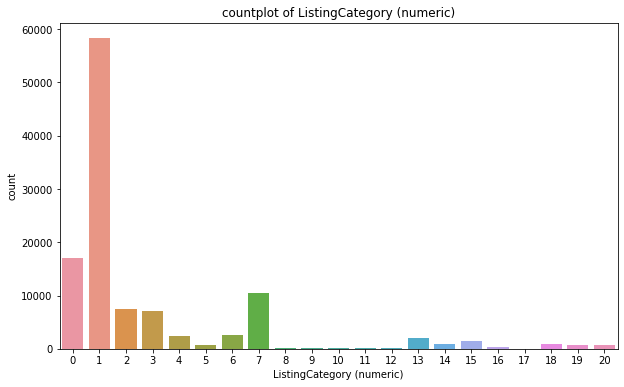

The top 1 listing categories are Debt Consolidation.


In [66]:
# plot the countplot of ListingCategory (numeric)
plt.figure(figsize = (10,6))
sb.countplot(loandata_analyze['ListingCategory (numeric)'])
plt.ylabel('count')
plt.title('countplot of ListingCategory (numeric)')
plt.show()
print('The top 1 listing categories are Debt Consolidation.')

## Countplot of IncomeRange
Most of the listing were made with income range between 25000 - 74,999, the shape of the distribution is similar to normal distribution.

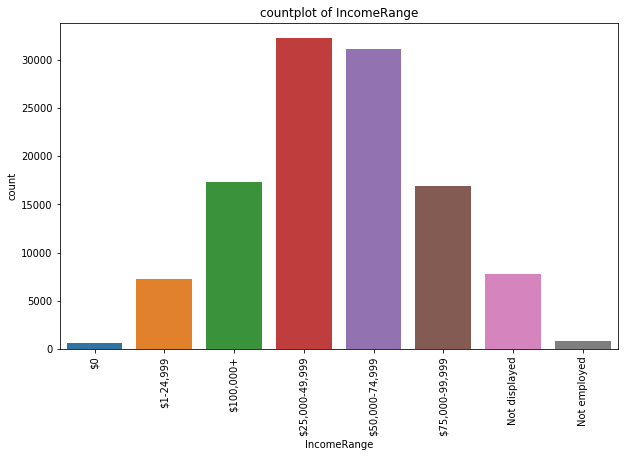

Most of the listing were made with income range between 25000 - 74,999, the shape of the distribution is similar to normal distribution.


In [67]:
# plot the countplot of IncomeRange
plt.figure(figsize = (10,6))
sb.countplot(loandata_analyze['IncomeRange'])
plt.ylabel('count')
plt.title('countplot of IncomeRange')
plt.xticks(rotation = 90)
plt.show()
print('Most of the listing were made with income range between 25000 - 74,999, the shape of the distribution is similar to normal distribution.')

<br>
<br>
There is no unusual unusual points in the data, most of the variables has long-tailed distribution which fit our common sense. In addition, the distribution of income range very similar to normal distribution and shows the the common income range of listing between 25,000 - 74,999.
<br>
There is no unusual distributions in the data, however, the distribution of 'DelinquenciesLast7Years' variable and 'LoanCurrentDaysDelinquent' variable not only shows the long-tailed attribute but also shows that most of the listing has 0 delinquencies.

## Relationship between numeric variable

In [68]:
numeric_variable = ['ProsperScore','Recommendations','MonthlyLoanPayment',
                 'LoanCurrentDaysDelinquent','Investors','DelinquenciesLast7Years']
category_variable = ['LoanStatus','CreditGrade','ListingCategory (numeric)',
                 'EmploymentStatus','IncomeRange']

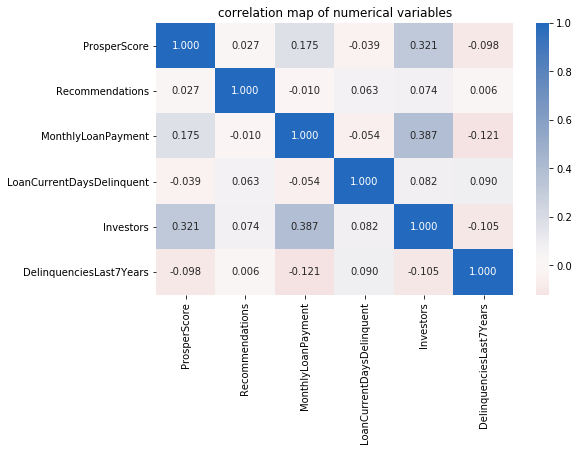

From the graph, we could see that Investors has linear relationship with prosperScore and MonthlyLoanPayment with correlation coefficient of 0.321 and 0.387. Since the correlation plot only shows the linear relationship between variables, we still need to draw scatterplot between each variables to see if there is non-linear relationship between them.


In [69]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loandata_analyze[numeric_variable].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('correlation map of numerical variables')
plt.show()
print('From the graph, we could see that Investors has linear relationship with prosperScore and MonthlyLoanPayment with correlation coefficient of 0.321 and 0.387. Since the correlation plot only shows the linear relationship between variables, we still need to draw scatterplot between each variables to see if there is non-linear relationship between them.')

From the graph, we could see that 'Investors' has linear relationship with 'prosperScore' and 'MonthlyLoanPayment with correlation coefficient of 0.321 and 0.387. 
Since the correlation plot only shows the linear relationship between variables, we still need to draw scatterplot between each variables to see if there is non-linear relationship between them.

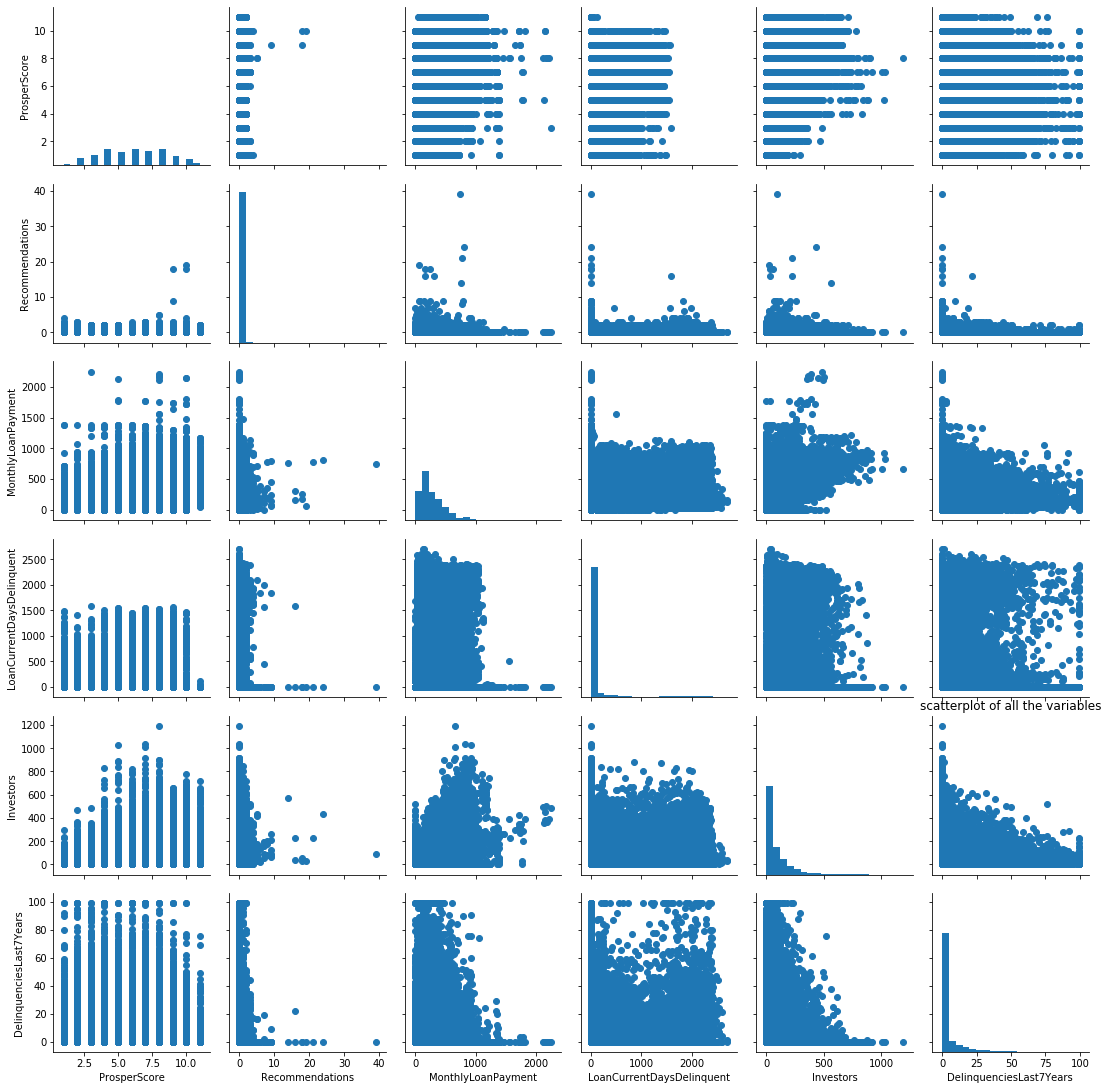

In [70]:
# plot 
g = sb.PairGrid(data = loandata_analyze, vars = numeric_variable)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.title('scatterplot of all the variables')
plt.show()

By taking look at the scatter plot, we could find that 'LoanCurrentDaysDelinquent' shows some really interesting attributes.
For instance, we could see that when 'recommendations', 'MonthlyLoanPayment' and 'investors' exceeds certain point, the 'LoanCurrentDaysDelinquent' drop to 0.
Besides, when we look at 'DelinquenciesLast7years', there is no relationship between this with 'LoanCurrentDaysDelinquent', since even 'DelinquenciesLast7years' is 0, the 'LoanCurrentDaysDelinquent' has many different values.

## Relationship between numeric variable
Although there seems to be no linear relationship between 'LoanCurrentDaysDelinquent' with other numerical variables, however,by taking look at the scatter plot, we could find that 'LoanCurrentDaysDelinquent' shows some really interesting attributes.
For instance, we could see that when 'recommendations', 'MonthlyLoanPayment' and 'investors' exceeds certain point, the 'LoanCurrentDaysDelinquent' drop to 0.
<br>
<br>
In addition, from the boxplot we could see that the lower the 'CrreditGrade', the higher the 'LoanCurrentDelaysDelinquent' could be.From the ListingCategory boxplot, we could see that type 4 personal loan has higher 'LoanCurrentDelaysDelinquent' compared to others.From the 'IncomeRange' plot we could see that incomerange with 0 are more likely to have higher 'LoanCurrentDelaysDelinquent' compared to others.
<br>
<br>
We expect that if one listin has no 0 'DelinquenciesLast7years', he/she should have less 'LoanCurrentDaysDelinquent'. However, there is no relationship between this with 'LoanCurrentDaysDelinquent', since even 'DelinquenciesLast7years' is 0, the 'LoanCurrentDaysDelinquent' has many different values.
<br>
<br>
Besides, We expect that 'Not-employed' tends to have higher 'LoanCurrentDelaysDelinquent'. However,we could see that 'retired' employment status tends to have higher 'LoanCurrentDelaysDelinquent' compared to others.

## Relationship between categorical variable

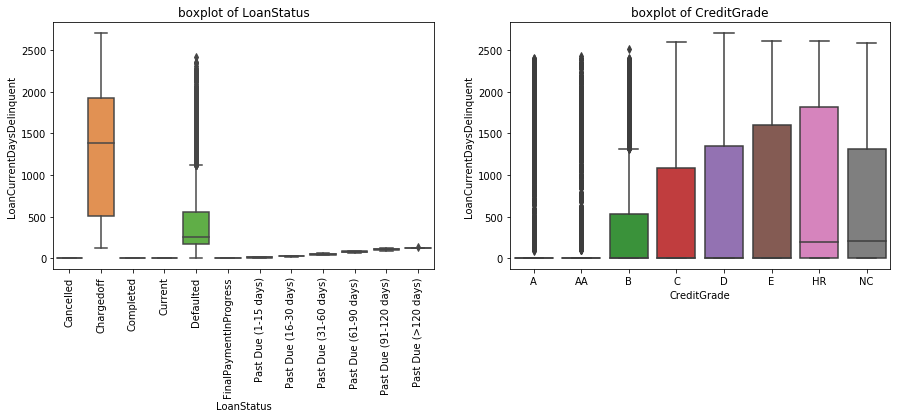

From the boxplot we could see that the lower the CrreditGrade, the higher the LoanCurrentDelaysDelinquent could be. This fits our common sense.


In [81]:
category_variable = ['LoanStatus','CreditGrade','ListingCategory (numeric)',
                 'EmploymentStatus','IncomeRange']
plt.figure(figsize = (15,10))
plt.subplot(221)
sb.boxplot(x = loandata_analyze['LoanStatus'],data = loandata_analyze,y = loandata_analyze['LoanCurrentDaysDelinquent'])
plt.xticks(rotation = 90)
plt.title('boxplot of LoanStatus')
plt.subplot(222)
sb.boxplot(x = loandata_analyze['CreditGrade'],data = loandata_analyze,y = loandata_analyze['LoanCurrentDaysDelinquent'])
plt.title('boxplot of CreditGrade')
plt.show()
print('From the boxplot we could see that the lower the CrreditGrade, the higher the LoanCurrentDelaysDelinquent could be. This fits our common sense.')

From the boxplot we could see that the lower the 'CrreditGrade', the higher the 'LoanCurrentDelaysDelinquent' could be. This fits our common sense.

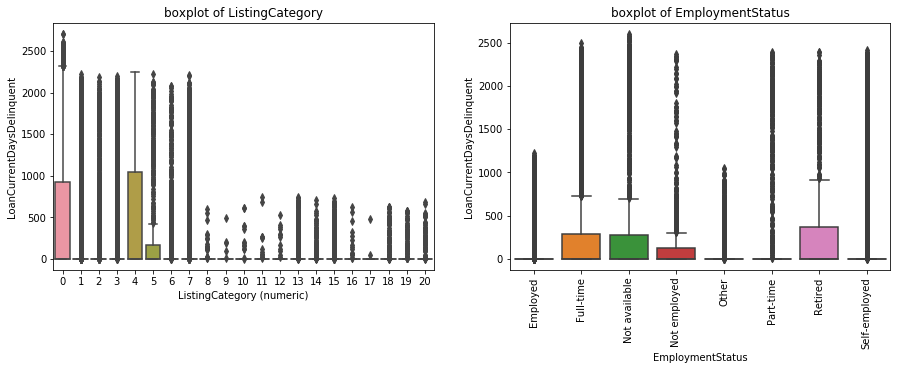

From the ListingCategory boxplot, we could see that type 4 personal loan has higher LoanCurrentDelaysDelinquent compared to others. Besides, we could see that retired employment status tends to have higher LoanCurrentDelaysDelinquent compared to others.


In [82]:
plt.figure(figsize = (15,10))
plt.subplot(221)
sb.boxplot(x = loandata_analyze['ListingCategory (numeric)'],data = loandata_analyze,y = loandata_analyze['LoanCurrentDaysDelinquent'])
plt.title('boxplot of ListingCategory')
plt.subplot(222)
sb.boxplot(x = loandata_analyze['EmploymentStatus'],data = loandata_analyze,y = loandata_analyze['LoanCurrentDaysDelinquent'])
plt.xticks(rotation = 90)
plt.title('boxplot of EmploymentStatus')
plt.show()
print('From the ListingCategory boxplot, we could see that type 4 personal loan has higher LoanCurrentDelaysDelinquent compared to others. Besides, we could see that retired employment status tends to have higher LoanCurrentDelaysDelinquent compared to others.')

From the ListingCategory boxplot, we could see that type 4 personal loan has higher 'LoanCurrentDelaysDelinquent' compared to others.
Besides, we could see that 'retired' employment status tends to have higher 'LoanCurrentDelaysDelinquent' compared to others.

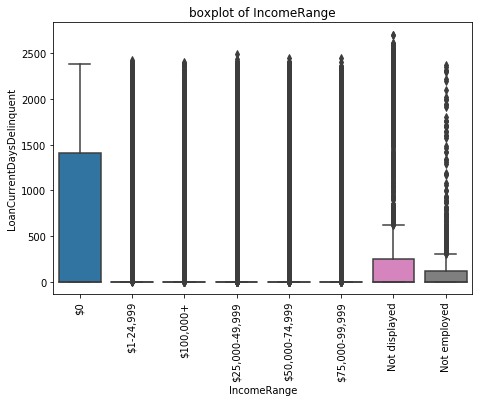

From the IncomeRange plot we could see that incomerange with 0 are more likely to have higher LoanCurrentDelaysDelinquent compared to others.


In [83]:
plt.figure(figsize = (7.5,5))
sb.boxplot(x = loandata_analyze['IncomeRange'],data = loandata_analyze,y = loandata_analyze['LoanCurrentDaysDelinquent'])
plt.xticks(rotation = 90)
plt.title('boxplot of IncomeRange')
plt.show()
print('From the IncomeRange plot we could see that incomerange with 0 are more likely to have higher LoanCurrentDelaysDelinquent compared to others.')

From the 'IncomeRange' plot we could see that incomerange with 0 are more likely to have higher 'LoanCurrentDelaysDelinquent' compared to others.

## Multivariate Exploration
Generally, as 'MonthlyLoanPayment' increases and exceeds 1000, the 'LoanCurrentDaysDelinquent' will drop significantly. However, this only applied to listing with employed 'EmploymentStatus'.
<br>
Even though 'investors' increases,this does not lower the 'LoanCurrentDaysDelinquent' with HR 'CreditGrade'.

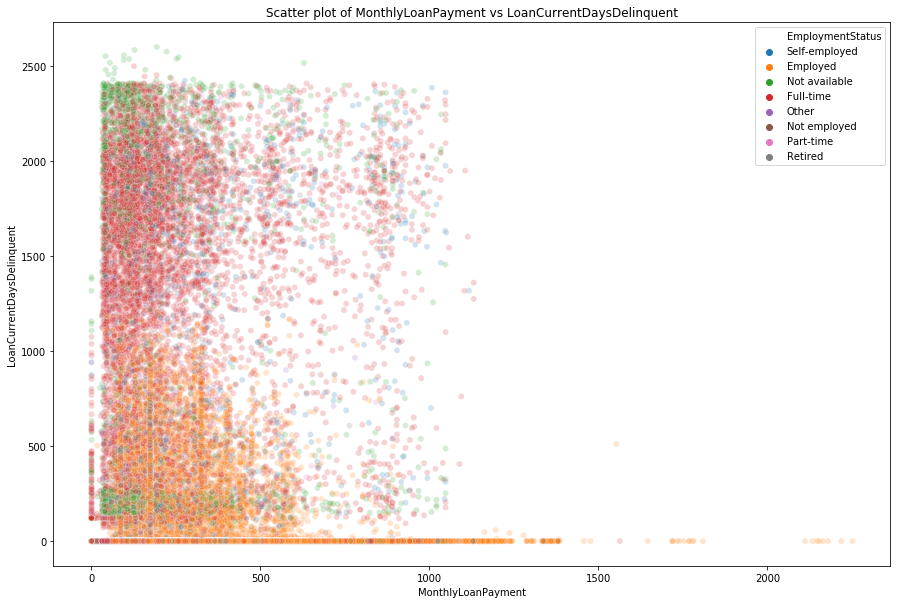

From the above figure, we could see that as MonthlyLoanPayment increase, the listing with employed employmentStatus tends to have lower LoanCurrentDaysDelinquent.


In [84]:
plt.figure(figsize = (15,10))
sb.scatterplot(x = 'MonthlyLoanPayment', y = 'LoanCurrentDaysDelinquent',
               data = loandata_analyze,hue = 'EmploymentStatus',alpha = 0.2)
plt.title('Scatter plot of MonthlyLoanPayment vs LoanCurrentDaysDelinquent')
plt.show()
print('From the above figure, we could see that as MonthlyLoanPayment increase, the listing with employed employmentStatus tends to have lower LoanCurrentDaysDelinquent.')

From the above figure, we could see that as 'MonthlyLoanPayment' increase, the listing with employed 'employmentStatus' tends to have lower 'LoanCurrentDaysDelinquent'.

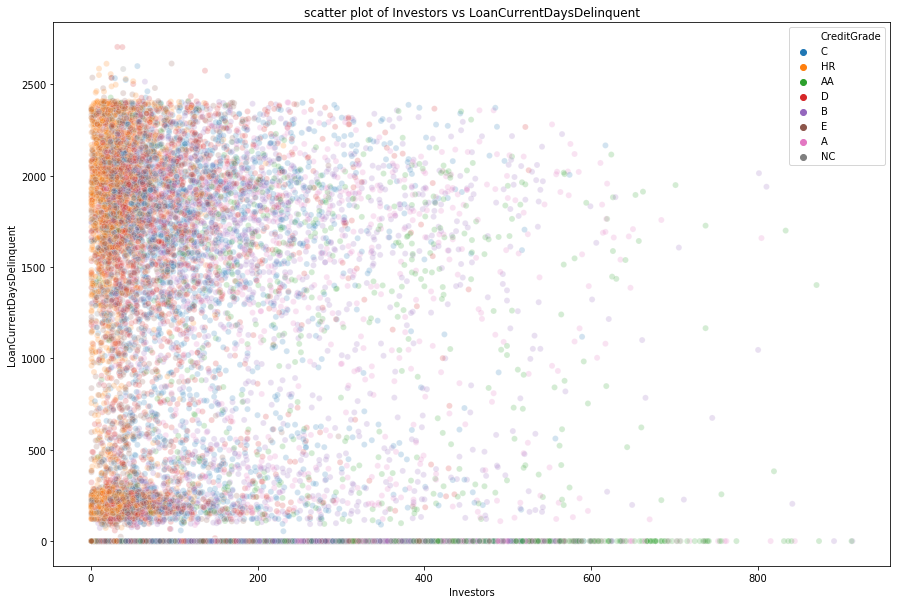

From the above figure, we could see that even though investors increases,this does not lower the LoanCurrentDaysDelinquent with HR CreditGrade.


In [85]:
plt.figure(figsize = (15,10))
sb.scatterplot(x = 'Investors', y = 'LoanCurrentDaysDelinquent',
               data = loandata_analyze,hue = 'CreditGrade',alpha = 0.2)
plt.title('scatter plot of Investors vs LoanCurrentDaysDelinquent')
plt.show()
print('From the above figure, we could see that even though investors increases,this does not lower the LoanCurrentDaysDelinquent with HR CreditGrade.')

From the above figure, we could see that even though 'investors' increases,this does not lower the 'LoanCurrentDaysDelinquent' with HR 'CreditGrade'.

In [ ]:
!jupyter nbconvert "prosperLoanData_slidedeck.ipynb" --to slides --post serve --template output_toggle.tpl

[NbConvertApp] Converting notebook prosperLoanData_slidedeck.ipynb to slides
[NbConvertApp] Writing 1336666 bytes to prosperLoanData_slidedeck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/prosperLoanData_slidedeck.slides.html
Use Control-C to stop this server
